# Intro to Classification

<img src="./imgs/CRT.png" />

## Objectives
At the end of this notebook the students should:   

* Be able to visualize data   
* Perform EDA in order to understand the relationship between dependent & independent variables.  
* Understand how Logistic Regression, Decision Tree, Random Forest models work   
* Understand when and how to use certain classification metrics 
* Do basic feature engineering and selection to improve models  
* Be able to create classification models in sklearn     

Data:  
We'll take a look at: [Heart Disease classification dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# Take a look at numerical variables
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
# Take a look at categorical variables
df.describe(include=['object'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### Step # 1  Basic Preprocessing for Logistic Regression Algo

In [6]:
### Basic Preprocessing : 

df_clean=df.copy()

for col in ['HeartDisease','Smoking','Stroke','AlcoholDrinking','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']:
    df_clean[col]=df_clean[col].apply(lambda x: 1 if x=='Yes' else 0)

In [7]:
df_clean['Sex']=df_clean.Sex.apply(lambda x: 1 if x=='Male' else 0)

In [8]:
df_clean.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [9]:
df_clean.AgeCategory=df_clean.AgeCategory.apply(lambda x :x.split('-')[0].split(' ')[0]).astype(int)

In [10]:
df_clean.AgeCategory.dtype

dtype('int64')

In [11]:
df_clean.AgeCategory.value_counts()

65    34151
60    33686
70    31065
55    29757
50    25382
80    24153
45    21791
75    21482
18    21064
40    21006
35    20550
30    18753
25    16955
Name: AgeCategory, dtype: int64

### Step #2) Basic EDA

In [12]:
df_clean.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

#### Investigate Class Balance

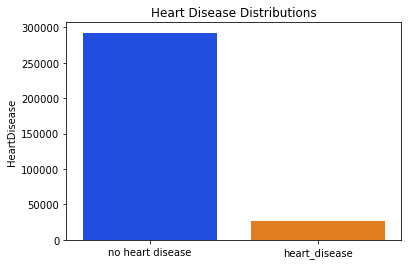

In [13]:
# A classic case of imbalanced data! 
labels=['no heart disease','heart_disease']
sns.barplot(x=labels,y=df_clean.HeartDisease.value_counts(),palette='bright')
plt.title('Heart Disease Distributions');

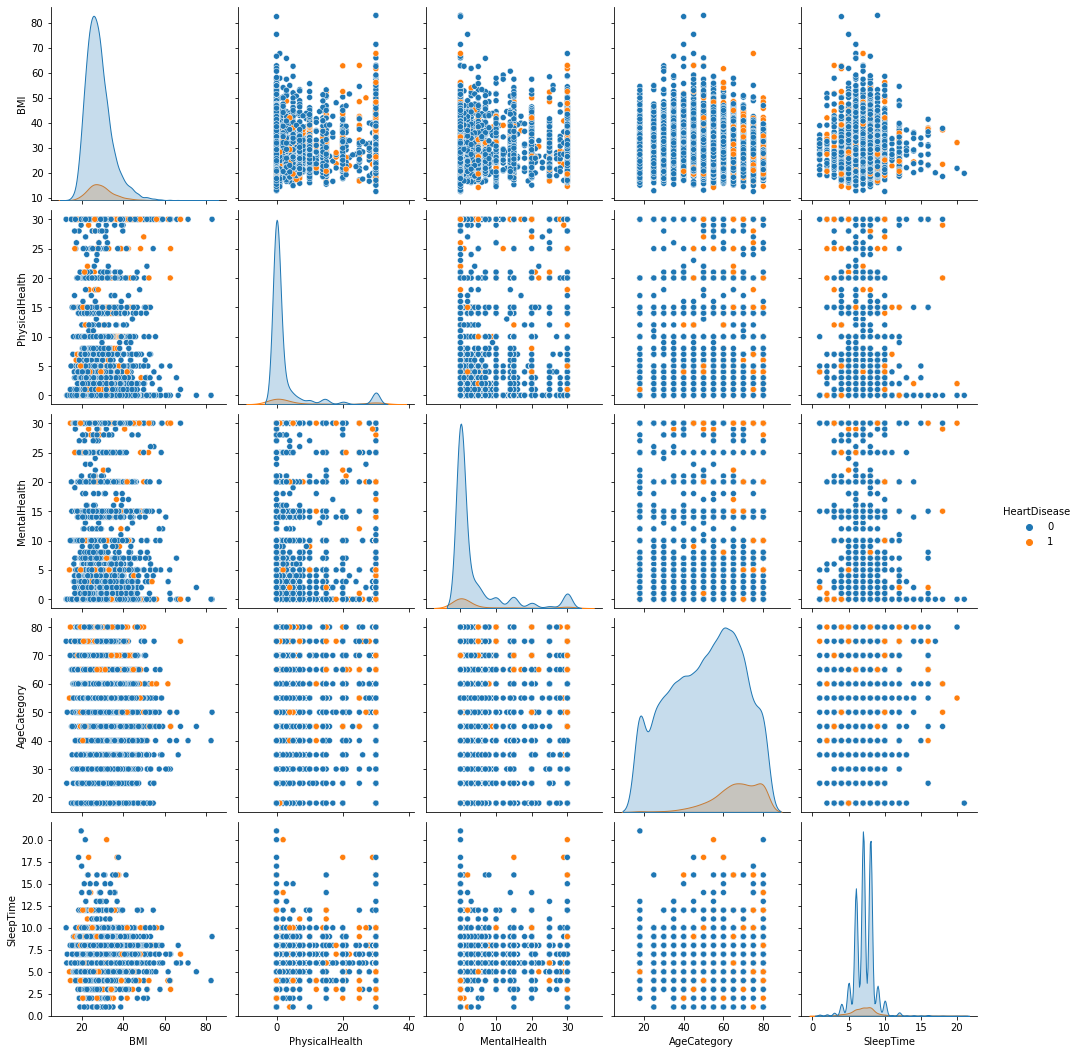

In [14]:
# Warning : may take a couple of minutes to run
df_samp=df_clean[['HeartDisease', 'BMI','PhysicalHealth', 'MentalHealth','AgeCategory','SleepTime']].sample(10000)
g=sns.pairplot(df_samp, hue='HeartDisease');
g.fig.set_size_inches(15,15)

### Step #3 Develop a Baseline model using Logistic Regression

In [15]:
df_clean.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [16]:
# stick with numerical features for now
df_num=df_clean.drop(['GenHealth','Race'],1)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_6077/2029450273.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num=df_clean.drop(['GenHealth','Race'],1)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

### Logistic Regression Model 

Logistic regression = sigmoid + decision Rule   

where **sigmoid**  is a mapping: 


<img src="https://www.gstatic.com/education/formulas2/443397389/en/sigmoid_function.svg" />

(where x is) : 
$$
x = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5  .. .
$$

<img src="./imgs/logistic_1.png" />


Other advantages of Logistic Regression: 

-  Interpretability 
-  Ranked probabilities

In [17]:
X=df_num.drop(columns=['HeartDisease'],axis=1)
y=df_num.HeartDisease 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)

print('Val Accuracy Score: {:6.3f}'.format(clf.score(X_val,y_val)))
print('\n')

probas=clf.predict_proba(X_train)[:,1]
print('Train ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_train,probas)))

probas=clf.predict_proba(X_val)[:,1]
print('Val ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

Val Accuracy Score:  0.917


Train ROC AUC Score:  0.828
Val ROC AUC Score:  0.830


###  Performance Metrics

### Confusion Matrix : 

<img src="https://miro.medium.com/max/1400/1*VSchph99Wiv6tQpNIvMJbw.png" />

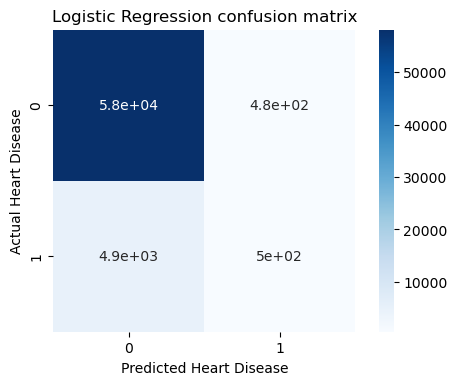

In [18]:
### Confusion Matrix

logtistic_confusion = confusion_matrix(y_val, clf.predict(X_val))
plt.figure(dpi=100)
sns.heatmap(logtistic_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=clf.classes_,
           yticklabels=clf.classes_)

plt.xlabel('Predicted Heart Disease')
plt.ylabel('Actual Heart Disease')
plt.title('Logistic Regression confusion matrix');

In [19]:
logtistic_confusion

array([[58117,   485],
       [ 4853,   504]])

### What  is Accuracy ? 

Accuracy = (TP + TN) / (TP + TN + FN + FP)   
(58117 + 504]) / (58117 + 504+ 4853+   504 )

### Why is Accuracy misleading in this case ? 

(58117 ]) / (58117 + 504+ 4853+   504 ) ~ .90  (i.e. even when TP=0 , accuracy is still high)

### What is AUC score? 

The AUC metric is a decent metric to use when we are dealing with imbalanced data. 

[from sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)
*ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better*


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png" />


[Data School has a great tutorial here](https://www.dataschool.io/roc-curves-and-auc-explained/)

Let's back up a minute and discuss thresholds! 

### Other Classification Metics 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb" />
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dd577aee2dd35c5b0e349327528a5ac606c7bbbf" />

In [ ]:
# Often times for medical data, we want to prioritize Recall (ie, minimize False Negatives!)

# BTW, High number of False Negatives (not good) .. 

### Thresholding : 



In [22]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    try: 
        y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    except:
        # adding functionality for xgboost 
        y_predict = (model.predict(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [23]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(clf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

###  Let's proceed using AUC, which should allow us to track the overall model performance (at any threshold)

### Step #4  Add Categorical Variables

In [25]:
df_clean.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

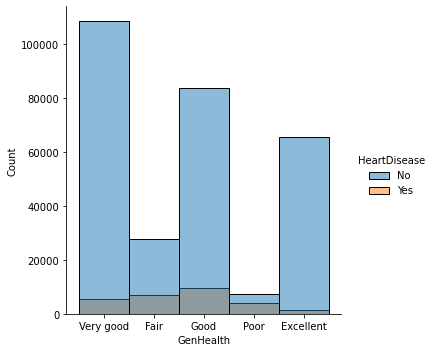

In [24]:
sns.displot(df[['HeartDisease','GenHealth']],x='GenHealth',hue='HeartDisease',bins=15);

In [26]:
df_comb=df_num.join(df_clean[['GenHealth']])

health_map={'Poor':1,'Fair':2,'Good':3,'Very good':4,'Excellent':5}
df_comb.GenHealth=df_comb.GenHealth.map(health_map)

df_comb.GenHealth.value_counts(dropna=False)

4    113858
3     93129
5     66842
2     34677
1     11289
Name: GenHealth, dtype: int64

### Exercise : 

* Iteratively add the GenHealth (numerical feature) & Race Categorical feature, retain variables if AUC score increases  

In [27]:
### TBD

X=df_comb.drop(columns=['HeartDisease'],axis=1)
y=df_comb.HeartDisease 

# note, that the test set is still 'the same' as before, because the random seed is the same, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

In [28]:
clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)
probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Val Score:  0.841


In [29]:
race_cats=df[['Race']].replace('Other','AAother')
race_cats=pd.get_dummies(race_cats,drop_first=True)
race_cats.head()

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [ ]:

df_comb=df_comb.join(race_cats)
X=df_comb.drop(columns=['HeartDisease'],axis=1)
y=df_comb.HeartDisease 

# note, that the test set is still 'the same' as before, because the random seed is the same, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)


In [32]:
clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)
probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Val Score:  0.841


### Step #5  Deeper look at numerical features

Text(0.5, 1.0, 'Heart Disease vs Age')

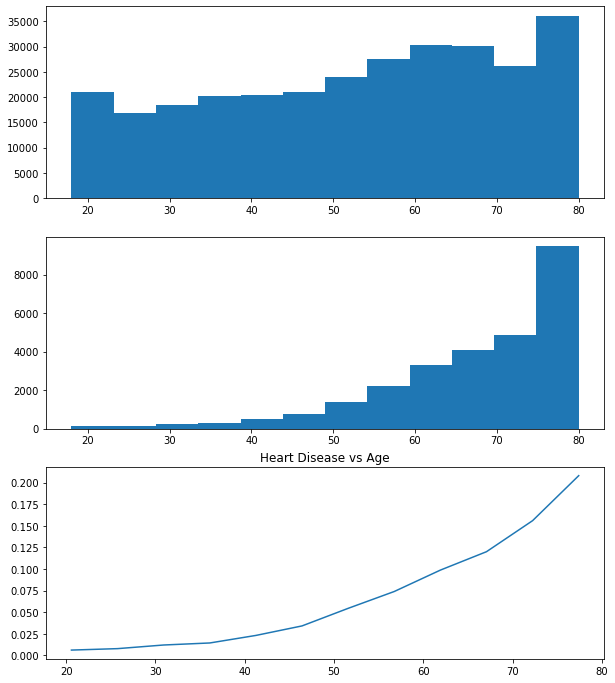

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(df_num.loc[(df_num.HeartDisease==0),'AgeCategory'], bins=12)
count1, bins_1, _ = ax[1].hist(df_num.loc[(df_num.HeartDisease==1),'AgeCategory'], bins=12)
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))
plt.title('Heart Disease vs Age')

In [33]:
df_num[['PhysicalHealth', 'MentalHealth']].describe()

,PhysicalHealth,MentalHealth
count,319795.00000,319795.000000
mean,3.37171,3.898366
std,7.95085,7.955235
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,2.00000,3.000000
max,30.00000,30.000000


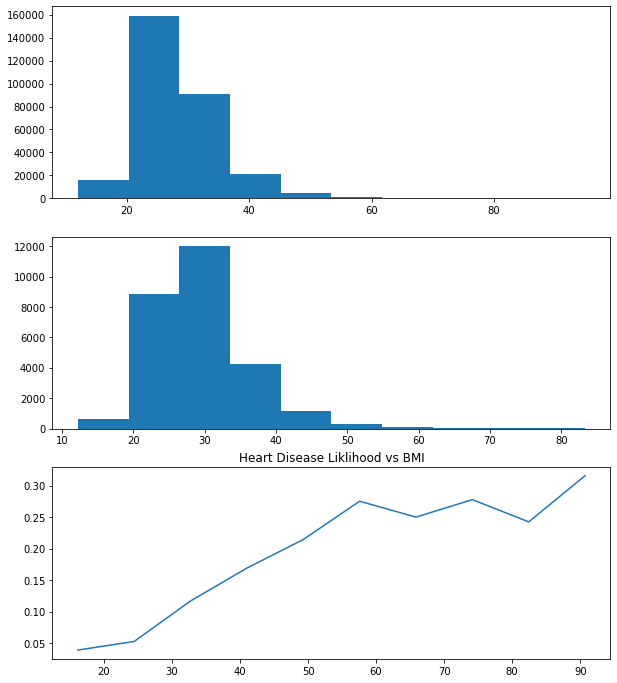

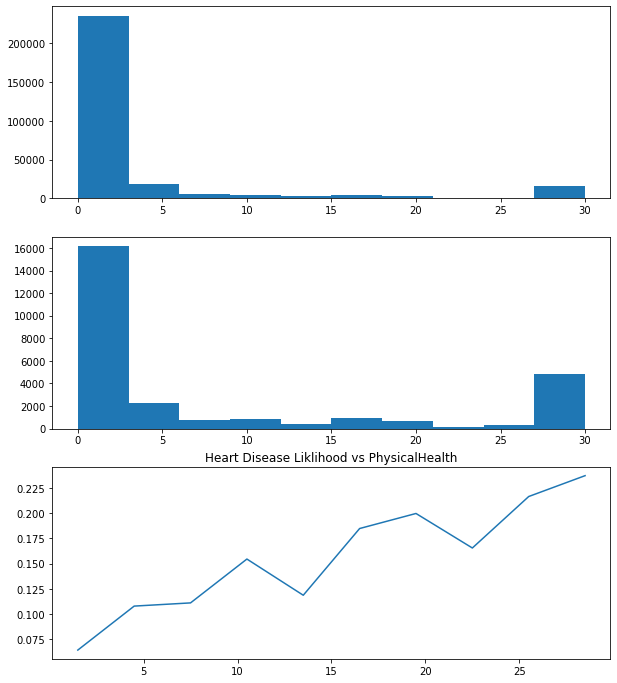

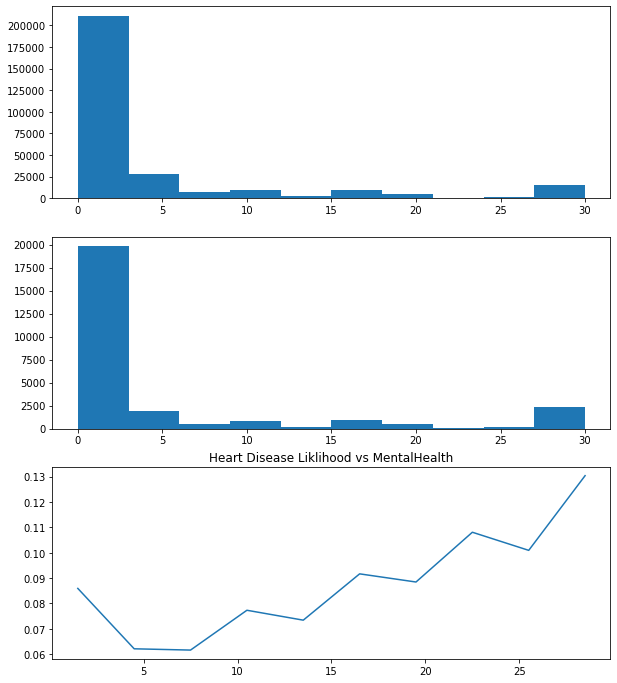

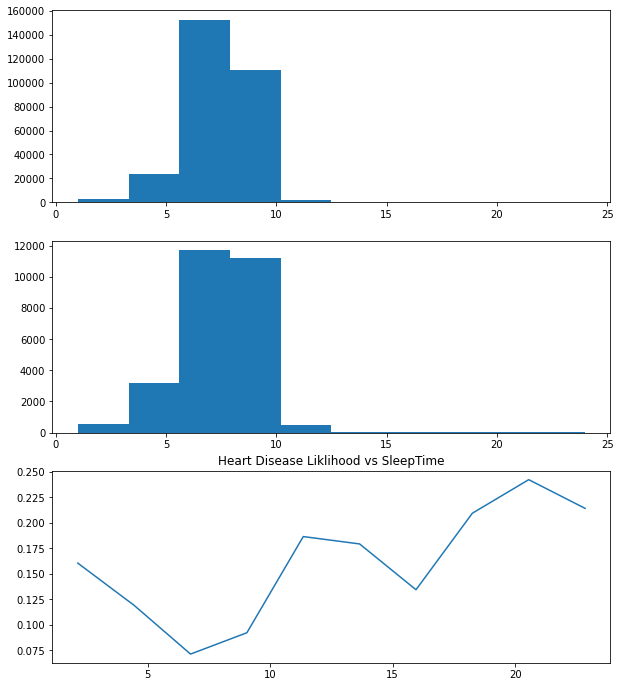

In [44]:
# from data source : Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

for i in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

    count0, bins_0, _ = ax[0].hist(df_num.loc[(df_num.HeartDisease==0),i])
    count1, bins_1, _ = ax[1].hist(df_num.loc[(df_num.HeartDisease==1),i])
    ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))
    plt.title('Heart Disease Liklihood vs '+i)

### Exercise  : 

* Try to convert SleepTime into a categorical, does performance improve? 

In [35]:
def sleep_map(x):
    if x >= 6 and x< 9:
        return 'six_eight'
    elif x >=9:
        return 'over_eight'
    else:
        return 'less_than_six'

In [36]:
df_comb['sleep_cats']=df_comb.SleepTime.apply(sleep_map)
sleep_dummies=pd.get_dummies(df_comb['sleep_cats'],drop_first=True)
df_comb=df_comb.join(sleep_dummies)

In [38]:
X_sleep_test=df_comb.drop(columns=['HeartDisease','SleepTime','sleep_cats'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_sleep_test, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)

#probas_train=clf.predict_proba(X_train)[:,1]
#print('ROC AUC Train Score: {:6.3f}'.format(roc_auc_score(y_train,probas_train)))

probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Val Score:  0.842


In [40]:
X_train.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'GenHealth', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_White', 'over_eight', 'six_eight'],
      dtype='object')

### Step #6  :  Add Class Balance

In [41]:
clf=LogisticRegression(max_iter=1000,class_weight='balanced').fit(X_train,y_train)
probas_train=clf.predict_proba(X_train)[:,1]
print('ROC AUC Train Score: {:6.3f}'.format(roc_auc_score(y_train,probas_train)))

probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Train Score:  0.841
ROC AUC Val Score:  0.842


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [46]:
## GridSearch optimal parameters  (Don't run .. )

# rerun to get full X_train (since we are using CV here . .)
X_train, X_test, y_train, y_test = train_test_split(X_sleep_test, y, test_size = 0.2, random_state = 123)

params= {'C': np.logspace(-3,3,7),'class_weight':[{0:1,1:1},{0:1,1:2},{0:1,1:3},{0:1,1:4}]}

model_name = "lr_model"
model_log="_lr"

Grid=GridSearchCV(estimator=clf, param_grid=params, scoring='roc_auc',
                  n_jobs=-1, cv=3, verbose=3)
model = Pipeline([
    ('scaling', StandardScaler()), 
    ('classification', Grid)
]).fit(X_train,y_train)

globals()['Grid%s' % model_log]=pd.DataFrame(Grid.cv_results_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV 1/3] END C=1000.0, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.2s
[CV 2/3] END C=0.001, class_weight={0: 1, 1: 2};, score=0.843 total time=   0.5s
[CV 1/3] END .C=0.01, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.3s
[CV 2/3] END .C=0.01, class_weight={0: 1, 1: 4};, score=0.843 total time=   0.3s
[CV 3/3] END ..C=0.1, class_weight={0: 1, 1: 2};, score=0.839 total time=   0.3s
[CV 2/3] END ..C=1.0, class_weight={0: 1, 1: 1};, score=0.843 total time=   0.4s


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END .C=10.0, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.3s
[CV 2/3] END .C=10.0, class_weight={0: 1, 1: 4};, score=0.843 total time=   0.3s
[CV 1/3] END C=100.0, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.4s
[CV 3/3] END C=100.0, class_weight={0: 1, 1: 3};, score=0.839 total time=   0.2s
[CV 3/3] END C=1000.0, class_weight={0: 1, 1: 1};, score=0.839 total time=   0.3s
[CV 3/3] END C=1000.0, class_weight={0: 1, 1: 3};, score=0.839 total time=   0.3s
[CV 2/3] END C=0.001, class_weight={0: 1, 1: 1};, score=0.843 total time=   0.4s
[CV 3/3] END C=0.001, class_weight={0: 1, 1: 3};, score=0.840 total time=   0.3s
[CV 1/3] END .C=0.01, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.2s
[CV 3/3] END .C=0.01, class_weight={0: 1, 1: 2};, score=0.839 total time=   0.3s
[CV 3/3] END ..C=0.1, class_weight={0: 1, 1: 1};, score=0.839 total time=   0.3s
[CV 1/3] END ..C=0.1, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.3s
[CV 2/3] END ..C=1.0, clas

In [47]:
Grid_lr.sort_values(by='mean_test_score').tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.213643,0.014792,0.026589,0.003182,0.01,"{0: 1, 1: 4}","{'C': 0.01, 'class_weight': {0: 1, 1: 4}}",0.841860,0.842857,0.839395,0.841371,0.001455,5
0,0.288972,0.063482,0.040261,0.010962,0.001,"{0: 1, 1: 1}","{'C': 0.001, 'class_weight': {0: 1, 1: 1}}",0.841896,0.842801,0.839437,0.841378,0.001421,4
1,0.502698,0.043957,0.050481,0.018508,0.001,"{0: 1, 1: 2}","{'C': 0.001, 'class_weight': {0: 1, 1: 2}}",0.841968,0.842921,0.839494,0.841461,0.001444,3
2,0.295143,0.080063,0.035156,0.013292,0.001,"{0: 1, 1: 3}","{'C': 0.001, 'class_weight': {0: 1, 1: 3}}",0.841971,0.842961,0.839522,0.841485,0.001446,2
3,0.176558,0.005947,0.021806,0.000918,0.001,"{0: 1, 1: 4}","{'C': 0.001, 'class_weight': {0: 1, 1: 4}}",0.841967,0.842985,0.839541,0.841498,0.001445,1


In [48]:
# Let's keep the previous model! 

### Final Interpretative Model & Feature Interpreation

In [52]:
# rerun the final interpretative .. 

X_train, X_test, y_train, y_test = train_test_split(X_sleep_test, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

clf=LogisticRegression(max_iter=1000,class_weight='balanced').fit(X_train,y_train)
probas_train=clf.predict_proba(X_train)[:,1]
print('ROC AUC Train Score: {:6.3f}'.format(roc_auc_score(y_train,probas_train)))

probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

probas_test=clf.predict_proba(X_test)[:,1]
print('ROC AUC Test Score: {:6.3f}'.format(roc_auc_score(y_test,probas_test)))

ROC AUC Train Score:  0.841
ROC AUC Val Score:  0.842
ROC AUC Test Score:  0.840


In [56]:
pd.DataFrame({'coef':clf.coef_[0],'exp_coef':np.exp(clf.coef_[0]),'abs_coef':np.abs(clf.coef_[0]),
                                                    'features':X_train.columns}).sort_values(by='abs_coef').tail()



,coef,exp_coef,abs_coef,features
9,0.495319,1.641022,0.495319,Diabetic
14,-0.519307,0.594933,0.519307,GenHealth
12,0.621791,1.862261,0.621791,KidneyDisease
7,0.758525,2.135124,0.758525,Sex
3,1.231761,3.427258,1.231761,Stroke


Interpretation of the Top Features : 

1) Previous stroke is associated with increased odds of Heart Disease by a factor of 3.42   
2) Male gender is associated with increased odds of Heart Disease by a factor of 2.13  
..  
4) Increase of one unit of GenHealth is associated with decreased odds of factor .595

### Tree-Based Models

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn import tree

#### Decision Trees

In [58]:
dt = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [81]:
y_train.value_counts()

0    234114
1     21722
Name: HeartDisease, dtype: int64

In [89]:
#  why did the tree split on 52.5 ? 
# it is common to consider only split points at certain percentiles of the distribution of values. For example, we may consider every tenth percentile (that is, 10%, 20%, 30%, etc).

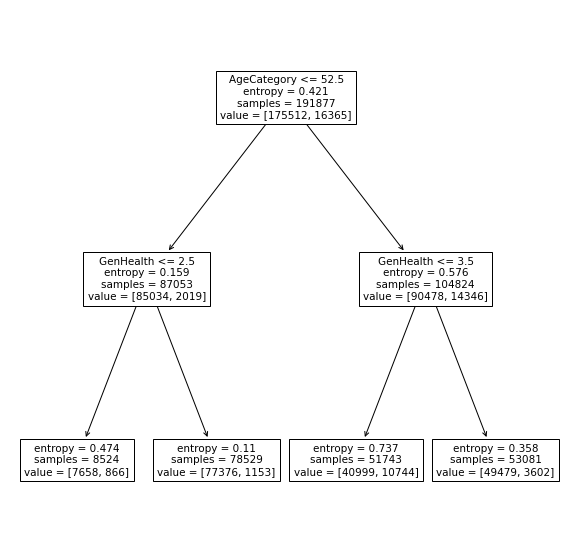

In [59]:
# only 2% of < 52.5 
plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=X_train.columns,);

####  Entropy (Information Gain ) is our new Metric

<img src="https://raw.githubusercontent.com/mbernste/mbernste.github.io/master/images/entropy_bernoulli.png" />

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
def testing_models(clf): 
    clf.fit(X_train,y_train)
    probas=clf.predict_proba(X_train)[:,1]
    print('Train ROC: {:6.3f}'.format(roc_auc_score(y_train,probas)))
    probas=clf.predict_proba(X_val)[:,1]
    print('Val ROC: {:6.3f}'.format(roc_auc_score(y_val,probas)))

In [74]:
clf=DecisionTreeClassifier(max_depth=10,criterion="entropy",class_weight='balanced')
testing_models(clf)

Train ROC:  0.858
Val ROC:  0.804


#### Random Forest

- A number of Decision Trees that have been developed on bootstrapped where only a subset of predictive features are used 

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png" />

In [62]:
### Random Forest 

clf=RandomForestClassifier()
testing_models(clf)

Train ROC:  0.999
Val ROC:  0.788


### Exercise : 

 * Adapt the *GridSearch optimal parameters* code for logistic regression(above), to develop gridsearch for Decision Tree & Random Forest models ( Note : no need to use standardscaler for trees).  Import features to try would be : 
max_depth, min_samples_leaf & class_weight.  Try more if you have time! 

[ref sklearn random forest documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
 ## TBD .. 
    

### How to interpret a Random Forest Model ? 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [100]:
clf=RandomForestClassifier(class_weight={0: 1, 1: 2},max_depth=15,min_samples_leaf=11,n_estimators=500)

clf.fit(X_train,y_train)
probas=clf.predict_proba(X_train)[:,1]
print('Train ROC: {:6.3f}'.format(roc_auc_score(y_train,probas)))
probas=clf.predict_proba(X_val)[:,1]
print('Val ROC: {:6.3f}'.format(roc_auc_score(y_val,probas)))

Train ROC:  0.880
Val ROC:  0.844


In [105]:
feat_df=pd.DataFrame({'importances':clf.feature_importances_,'features':X_train.columns}).sort_values(by='importances')
feat_df.tail()

,importances,features
0,0.071475,BMI
6,0.071736,DiffWalking
3,0.096113,Stroke
15,0.174767,GenHealth
8,0.235934,AgeCategory


###  Continue search for the optimal performative model  .. 

### XGBoost Mathematical Framework


**First Pass (Regression)**:

Let's start by briefly returning to random forests. With the RF algorithm, we start with a very low bias but high variance **strong learner**, and reduce its variance by averaging across many relatively uncorrelated copies. Recall that we get these copies by injecting randomness into each base tree in the forest ensemble (taking bootstrapped samples of the training data, subsampling the feature columns for each tree split). The end result is a model that overfits less than a single decision tree due to variance reduction. 

![](images/RFDiagram.jpg)

Boosting models are a flipped version of this paradigm. Instead of a strong learner, we start with a high bias but low variance **weak learner** and reduce its bias by training models that iteratively correct for the mistakes made by previous models. Building a sort of tower of weak models in this fashion makes for a strong ensemble that doesn't underfit, and the low variance of each base model helps insulate the ensemble from overfitting.

The most powerful variety of boosting in modern ML is **gradient boosted trees**, which we'll focus on. Our base learner is a simple decision tree with relatively small depth / few decision splits. We will build a final model by adding the results of many such trees together. The most intuitive problem setting to start with here is regression, with the usual sum of the squared errors (SSE) as the loss function we aim to minimize for data $X, y$. In each step of model building, we fit a base learner tree to the residuals of the current model's training predictions, adding it to the ensemble and gradually decreasing our training error. 

In (mostly) english, here's what we do:

* We'll train $k$ (hyperparameter) base learner decision trees with max depth $d$ (hyperparameter) step by step, adding each to our overall model.
* Each base tree is fit using our data $X$, but the target values are the residuals $y - model_{cur}$, where $model_{cur}$ is our overall model at that time step (sum of previous trees and initialization)  
* We initialize our model with the best constant prediction, $mean(y)$.   

As an algorithm:

1. Set $T_0 = mean(y)$
2. For $m = 1,...,k$:
    1. Set $r_{m-1} = y - (T_0 + \sum\limits_{j=1}^{m-1}T_j(X))$
    2. Fit max depth $d$ tree $T_m$ with features $X$, target $r_{m-1}$
  
Obtain final model: $F(X) = T_0 + T_1(X) + ... + T_k(X)$

![](images/RegressDiagram.png)


In [112]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb

In [117]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


xgb = XGBClassifier(n_estimators=300, objective='binary:logistic', nthread=1)

folds = 3
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 123)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train, y_train), verbose=3, random_state=123 )

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is depre

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 

[12:20:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:20:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f89517d5270>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None, si

In [118]:
random_search.best_score_

0.8420888386092109

In [119]:
random_search.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [120]:
final_model= random_search.best_estimator_

In [123]:
feat_df=pd.DataFrame({'importances':final_model.feature_importances_,'features':X_train.columns}).sort_values(by='importances')
feat_df.tail()

,importances,features
9,0.098100,Diabetic
3,0.103658,Stroke
6,0.150843,DiffWalking
15,0.154594,GenHealth
8,0.174685,AgeCategory


### And Finally,  let's pick the final threshold

In [125]:
interactive(lambda threshold: make_confusion_matrix(clf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


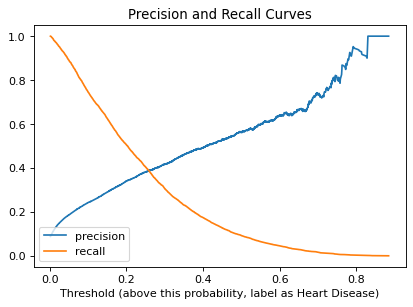

In [165]:
from sklearn.metrics import precision_recall_curve
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, final_model.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Heart Disease)');
plt.title('Precision and Recall Curves');

In [156]:
#### Assign a cost to TP,FP,FN,TN . .

# TP : 50000 (some people )
# FN : 500000  
# TN : 0 
# FP : 10000
    
#costs=[np.sum(conf_mat[i]*[[0,5],[500,0]]) for i in range(len(conf_mat))]

cost_list=[]
for i in np.arange(0,1,.01):
    preds = final_model.predict_proba(X_test)[:,1] >= i
    conf_mat=confusion_matrix(y_test, preds )
    cost_list.append(np.sum(conf_mat*[[0,10000],[500000,50000]]))

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

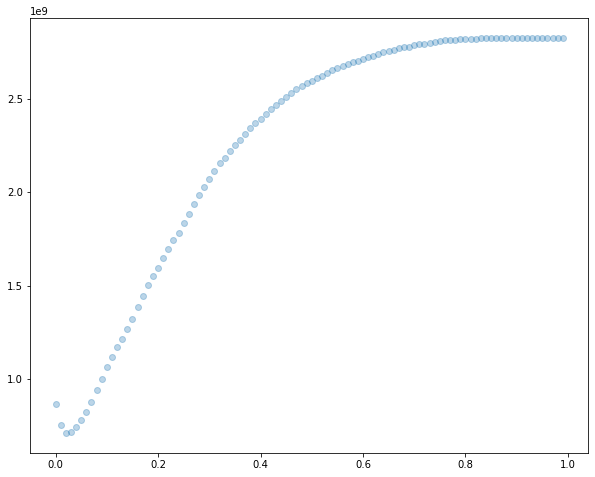

In [158]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(0,1,.01),cost_list,alpha=.3);

In [160]:
np.arange(0,1,.01)[np.argmin(cost_list)]


0.02

In [162]:
preds = final_model.predict_proba(X_test)[:,1] >= .02
conf_mat=confusion_matrix(y_test, preds )



/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([[24947, 33361],
       [  212,  5439]])

In [ ]:
#  https://www.cbsnews.com/news/how-much-would-a-heart-attack-cost-you/#:~:text=According%20to%20an%20article%20from,%2D%2Dis%20about%20%241%20million.

In [166]:
from sklearn.metrics import recall_score, precision_score

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


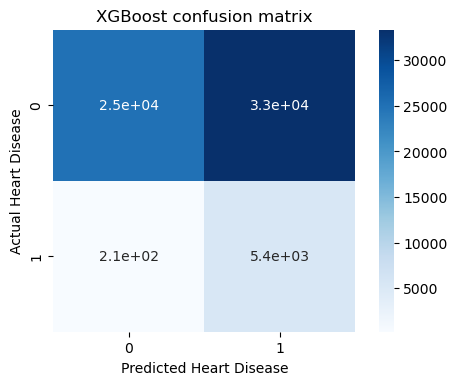

In [170]:
final_confusion = confusion_matrix(y_test, final_model.predict_proba(X_test)[:,1] >= .02)
plt.figure(dpi=100)
sns.heatmap(final_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=clf.classes_,
           yticklabels=clf.classes_)

plt.xlabel('Predicted Heart Disease')
plt.ylabel('Actual Heart Disease')
plt.title('XGBoost confusion matrix');

In [171]:
final_confusion

array([[24947, 33361],
       [  212,  5439]])

In [174]:
Recall_score=(5439)/(5439+212)
Recall_score

0.9624845160148646

In [175]:
Precision_score=(5439)/(5439+33361)
Precision_score

0.14018041237113402